# Regression model for determing the housing prices

## importing and splitting data

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
# import data (only numerical)
data = pd.read_csv('data/AmesHousingNumData.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,0.055607,-0.730498,-1.155886,-1.019607,-0.368243,1.281557,0.065626,0.258714,0.309465,0.313663,-0.061812,0.433656
1,-0.569515,-0.689605,-1.107938,-1.019607,-0.335146,-0.675537,-0.384244,1.197200,-1.003952,-1.192617,-0.771063,-0.944774
2,0.033281,-0.812285,-1.251781,-1.019607,-0.434438,0.439492,0.631372,-0.744814,-1.003952,-0.334434,-0.061812,-0.105185
3,-0.569515,-0.403350,-0.772303,0.794069,-0.103465,2.450663,2.405858,0.230839,0.309465,1.213467,0.647439,0.797060
4,-0.569515,0.782561,0.666134,0.794069,0.856357,-0.593133,-0.279728,0.045000,0.309465,0.260151,-0.771063,0.119123


In [72]:
# split data into input and target
target = data['SalePrice']
final_data = data.drop('SalePrice', axis=1)
final_data.head()

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual
0,0.055607,-0.730498,-1.155886,-1.019607,-0.368243,1.281557,0.065626,0.258714,0.309465,0.313663,-0.061812
1,-0.569515,-0.689605,-1.107938,-1.019607,-0.335146,-0.675537,-0.384244,1.197200,-1.003952,-1.192617,-0.771063
2,0.033281,-0.812285,-1.251781,-1.019607,-0.434438,0.439492,0.631372,-0.744814,-1.003952,-0.334434,-0.061812
3,-0.569515,-0.403350,-0.772303,0.794069,-0.103465,2.450663,2.405858,0.230839,0.309465,1.213467,0.647439
4,-0.569515,0.782561,0.666134,0.794069,0.856357,-0.593133,-0.279728,0.045000,0.309465,0.260151,-0.771063


In [73]:
# convert the pandas dataframes to numpy ndarrays
X_np = final_data.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)


## Building model

#### Adding  $x_0$to the data

First an extra feature $x_0$ has to be added to the data. This is to make the computations easier.

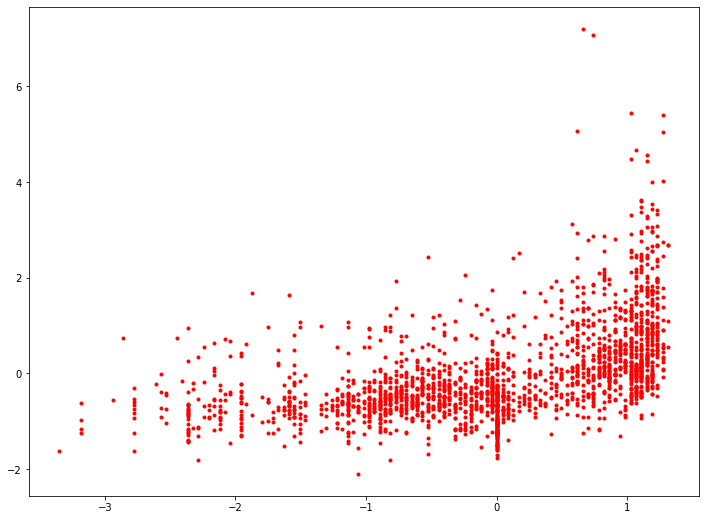

In [74]:
def add_x0(x):
    '''
    This function takes a column vector x, adds a column vector of ones in front of it, and returns the 
    combined matrix.
    '''
    # create new feature vector of ones in shape of number of samples * 1 column vector 
    x_zero = np.ones((len(x), 1), dtype = int)

    # combine the new and old feature vectors into matrix
    return np.hstack((x_zero, x))


# make column vector for one feature for testing
X_single_feature = X_train[:, 1, None]

# make column vector out of row vector
y_train = y_train[..., None]

#print(y_train)

# plot the datapoints
plt.figure(figsize=(12,9))
plt.plot(X_single_feature, y_train, 'r.')
plt.show()

# create feature with x0
X = add_x0(X_single_feature)

#print(X)








#### Defining the linear model


An easy example of a **univariate linear regression** what will be done is the following.

$$x^1_0 \theta_0 + x^1_1 \theta_1 = h_{\theta}(x^1)$$
$$x^2_0 \theta_0 + x^2_1 \theta_1 = h_{\theta}(x^2)$$
$$x^3_0 \theta_0 + x^3_1 \theta_1 = h_{\theta}(x^3)$$ 
$$\dots$$
$$x^m_0 \theta_0 + x^m_1 \theta_1 = h_{\theta}(x^m)$$

In terms of matrix multiplication:

$$ \left[\begin{array}{cccc}
x^1_0 & x^1_1 \\ 
x^2_0 & x^2_1 \\
x^3_0 & x^3_1 \\ 
\vdots & \vdots \\
x^m_0 & x^m_1 \\ 
\end{array} \right]
\left[\begin{array}{c} \theta_0 \\ \theta_1 \end{array} \right]
= \left[\begin{array}{c} h_{\theta}(x^1) \\ h_{\theta}(x^2) \\
h_{\theta}(x^3) \\ \vdots \\ h_{\theta}(x^m) \end{array} \right]$$


Our model is the **multivariate linear** regression model which will look like the following:

$$x^1_0 \theta_0 + x^1_1 \theta_1 + \dots + x^1_n \theta_n = h_{\theta}(x^1)$$
$$x^2_0 \theta_0 + x^2_1 \theta_1 + \dots + x^2_n \theta_n = h_{\theta}(x^2)$$
$$x^2_0 \theta_0 + x^2_1 \theta_1 + \dots + x^2_n \theta_n = h_{\theta}(x^2)$$
$$\dots$$
$$x^m_0 \theta_0 + x^m_1 \theta_1 + \dots + x^m_n \theta_n = h_{\theta}(x^m)$$

With *n* being the number of features and *m* the number of samples


In terms of multiplication:

$$ \left[\begin{array}{cccc}
x_0^1 & x_1^1 & x_2^1 & \cdots & x_n^1 \\ 
x_0^2 & x_1^2 & x_2^2 & \cdots & x_n^2 \\ 
x_0^3 & x_1^3 & x_2^3 & \cdots & x_n^3 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_0^m & x_1^m & x_2^m & \cdots & x_n^m \\ 
\end{array} \right]
\left[\begin{array}{c} \theta_0 \\ \theta_1 \\
\theta_2 \\ \vdots \\ \theta_n \end{array} \right]
= \left[\begin{array}{c} h_{\theta}(x^1) \\ h_{\theta}(x^2) \\
h_{\theta}(x^3) \\ \vdots \\ h_{\theta}(x^m) \end{array} \right]$$


In [75]:
def define_theta(X):
    '''Returns starting vector for theta with amount of features.'''
    return np.ones((X.shape[1], 1))


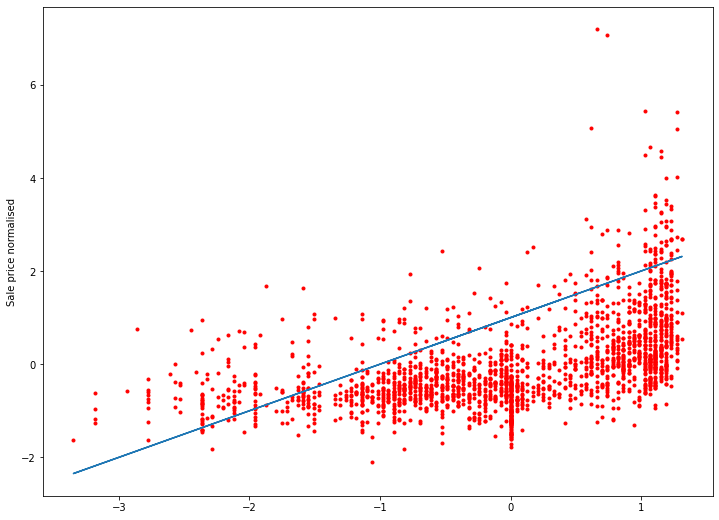

In [76]:
def linear_model(X, theta):
    '''
    This function takes a matrix X and a vector theta and returns the resulting column vector of hypothesis
    values.
    '''
    return np.matmul(X, theta)

theta = define_theta(X)
#print(theta)

# compute the linear model
h = linear_model(X, theta)
#print(h)

# plot the model results for just one of the features
plt.figure(figsize=(12,9))
plt.plot(X_single_feature, y_train, 'r.')
plt.plot(X_single_feature, h)

plt.ylabel('Sale price normalised')
plt.show()

### optimizing Theta

#### Defining linear cost

In [77]:
def linear_cost(theta, X, y):
    '''
    This function returns the cost using matrix multiplication. 
    '''
    # m is identical to the number of rows in X
    m = X.shape[0]

    # compute error vector 
    residual = linear_model(X, theta) - y
    
    # compute cost vector  
    cost = np.matmul(residual.T, residual) / (2 * m)
    
    # convert the resulting 1 x 1 numpy matrix to an actual scalar 
    return np.squeeze(cost)

#### Defining gradient vector

In [78]:
def gradient_vector(theta, X, y):
    '''
    This functions returns a (n + 1) * 1 column vector of partial derivatives. 
    '''
    # m is identical to the number of rows in X
    m = X.shape[0]
    
    # compute error vector
    error = linear_model(X, theta) - y 
    
    # compute matrix product of the error and X
    gradient_vector = np.matmul(X.T, error) / m
  
    return gradient_vector


Found the following values for theta:
[[-0.00738177]
 [ 0.50494804]]

Resulting in the following model:


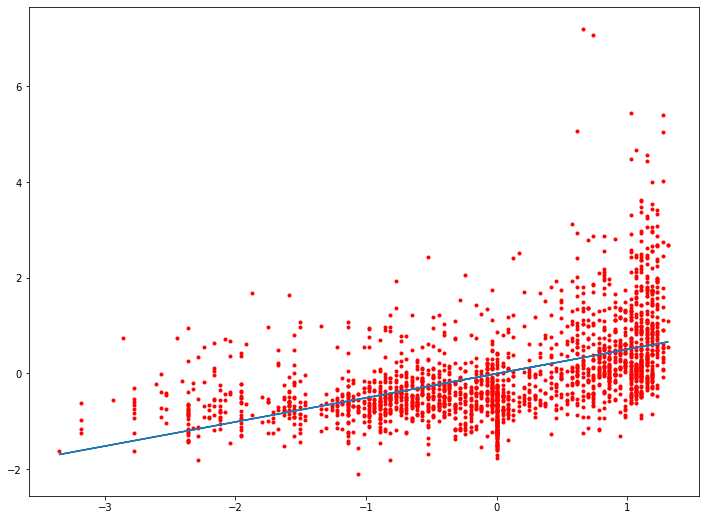

In [79]:
def gradient_descent(X, y, theta, alpha, thres=10**-6):
    '''
    This function returns a vector for theta for which the cost is the minimum. 
    '''
    # calculate cost with current theta
    previous_cost = linear_cost(theta, X, y)
    
    # set cost difference to amount bigger than the threshold and bigger than 0
    cost_difference = thres + 1
    
    # loop indefinitely until algorithm converges
    while cost_difference > thres: 
        
        # compute and update theta parameters in a single operation
        theta = theta - alpha * gradient_vector(theta, X, y)

        # calculate cost vector with new theta
        current_cost = linear_cost(theta, X, y)

        cost_difference = abs(current_cost - previous_cost)
        
        #print(cost_difference)

        if current_cost > previous_cost:
            print('The algorithm is diverging.')
            return theta

        previous_cost = current_cost
    
    return theta

# Find the theta vector that minimizes the cost function
theta_hat = gradient_descent(X, y_train, theta, 0.9)
print("\nFound the following values for theta:")
print(theta_hat)


# Plot the model results
print("\nResulting in the following model:")
h = linear_model(X, theta_hat)
plt.figure(figsize=(12,9))
plt.plot(X_single_feature, y_train, 'r.')
plt.plot(X_single_feature, h)
plt.show()